# Introdução


O câncer de mama é o tipo mais comum de câncer entre as mulheres no mundo. Ele representa 25% de todos os casos de câncer e afetou mais de 2,1 milhões de pessoas apenas em 2015. Ele se inicia quando as células na mama começam a crescer descontroladamente. Essas células geralmente formam tumores que podem ser detectados por meio de raios-X ou sentidos como caroços na área da mama.
O presente trabalho tem o objetivo, a partir do conjunto de dados Breast Cancer Dataset, buscar correlações entre features e estabelecer as features de interesse para modelos preditivos.
Este estudo poderá ser benéfico para implementação de métodos preditivos para detecção e prevenção ao câncer de mama.

# Objetivos

* Analisar de forma exploratória o dataset;
* Realizar o tratamento e limpeza dos dados, caso seja necessário;
* Analisar as correlações entre das features do dataset;
* Implementar ML para evidenciar as principais features para predição.

# Metodologia

* Aplicar métodos de análise exploratória e limpeza de dados com pandas;
* Levantar estatísticas descritas das features do dataset;
* Analisar numerica e graficamente a correlação entre as features;
* Aplicar imblearn e sklearn para levantar as features de maior importância na predição;

# Importações e instalações

In [2]:
# instalando biblioteca imblearn

!pip install imblearn

In [3]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from imblearn.under_sampling import RandomUnderSampler, TomekLinks 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Importando dados do dataset breast-cancer.csv

data = pd.read_csv("breast-cancer.csv", sep =",", encoding = "latin-1")


# Dados

In [5]:
# Visualizando o cabeçalho do dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Análise Exploratória e Tratamento dos Dados

In [6]:
data.shape

(569, 32)

In [7]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

* Observções

O dataframe possui 569 linhas e 32 colunas. As colunas estão dividas em três grupos:

- valores médios (_mean): radius, texture, perimeter, aream smoothness, caompactness, concavity, conacave points, symmetry e fractal dimension

- erro padrão (_se): radius, texture, perimeter, aream smoothness, caompactness, concavity, conacave points, symmetry e fractal dimension

- valores máximos (_worst): radius, texture, perimeter, aream smoothness, caompactness, concavity, conacave points, symmetry e fractal dimension

Como pretendemos obsersar as correlações entre as variáveis de interesse, iremos excluir os dados referentes ao erro padrão das características.

In [8]:
# Removendo colunas id, por não ser relevante para nossa análise
# Removendo  radius_se, texture_se, perimeter_se, area_se, smoothness_se, caompactness_se, concavity_se, conacave_points_se, symmetry_se e fractal_dimension_se

data = data.drop("id", axis = 1)
data = data.drop("radius_se", axis = 1)
data = data.drop("texture_se", axis = 1)
data = data.drop("perimeter_se", axis = 1)
data = data.drop("area_se", axis = 1)
data = data.drop("smoothness_se", axis = 1)
data = data.drop("compactness_se", axis = 1)
data = data.drop("concavity_se", axis = 1)
data = data.drop("concave points_se", axis = 1)
data = data.drop("symmetry_se", axis = 1)
data = data.drop("fractal_dimension_se", axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Renomeando o cabeçalho do dataframe para melhor interpretação

novo_nome_colunas = {
    "diagnosis": "diagnostico",
    "radius_mean": "raio_medio",
    "texture_mean": "textura_media",
    "perimeter_mean": "perimetro_medio",
    "area_mean": "area_media",
    "smoothness_mean": "suavidade_media",
    "compactness_mean": "compacidade_media" ,
    "concavity_mean": "concavidade_media",
    "concave points_mean": "pontos_concavos_media" ,
    "symmetry_mean": "simetria_media" ,
    "fractal_dimension_mean": "dimensao_fractal_media",
    "radius_worst": "raio_maximo",
    "texture_worst": "textura_maxima",
    "perimeter_worst": "perimetro_maximo",
    "area_worst": "area_maxima",
    "smoothness_worst": "suavidade_maxima",
    "compactness_worst": "compacidade_maxima",
    "concavity_worst": "concavidade_maxima",
    "concave points_worst": "pontos_concavos_maximo",
    "symmetry_worst": "simetria_maxima",
    "fractal_dimension_worst": "dimensao_fractal_maxima",
    
}

data = data.rename(columns=novo_nome_colunas)

data.head()

,diagnostico,raio_medio,textura_media,perimetro_medio,area_media,suavidade_media,compacidade_media,concavidade_media,pontos_concavos_media,simetria_media,...,raio_maximo,textura_maxima,perimetro_maximo,area_maxima,suavidade_maxima,compacidade_maxima,concavidade_maxima,pontos_concavos_maximo,simetria_maxima,dimensao_fractal_maxima
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Verificando a existência de dados ausentes
data.isnull().sum()

diagnostico                0
raio_medio                 0
textura_media              0
perimetro_medio            0
area_media                 0
suavidade_media            0
compacidade_media          0
concavidade_media          0
pontos_concavos_media      0
simetria_media             0
dimensao_fractal_media     0
raio_maximo                0
textura_maxima             0
perimetro_maximo           0
area_maxima                0
suavidade_maxima           0
compacidade_maxima         0
concavidade_maxima         0
pontos_concavos_maximo     0
simetria_maxima            0
dimensao_fractal_maxima    0
dtype: int64

Não há dados ausentes no dataset

In [11]:
#verificando a presença de dados duplicados
data.duplicated().sum()

0

Não há duplicatas no dataframe

In [12]:
# Visualizando informações do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnostico              569 non-null    object 
 1   raio_medio               569 non-null    float64
 2   textura_media            569 non-null    float64
 3   perimetro_medio          569 non-null    float64
 4   area_media               569 non-null    float64
 5   suavidade_media          569 non-null    float64
 6   compacidade_media        569 non-null    float64
 7   concavidade_media        569 non-null    float64
 8   pontos_concavos_media    569 non-null    float64
 9   simetria_media           569 non-null    float64
 10  dimensao_fractal_media   569 non-null    float64
 11  raio_maximo              569 non-null    float64
 12  textura_maxima           569 non-null    float64
 13  perimetro_maximo         569 non-null    float64
 14  area_maxima              5

# Estatísticas

In [13]:
# Estatisticas descritivas
data.describe()

,raio_medio,textura_media,perimetro_medio,area_media,suavidade_media,compacidade_media,concavidade_media,pontos_concavos_media,simetria_media,dimensao_fractal_media,raio_maximo,textura_maxima,perimetro_maximo,area_maxima,suavidade_maxima,compacidade_maxima,concavidade_maxima,pontos_concavos_maximo,simetria_maxima,dimensao_fractal_maxima
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
# Contando casos de diagnostico de tumores malignos e benignos
total_categoria = data["diagnostico"].value_counts()
total_categoria

B    357
M    212
Name: diagnostico, dtype: int64

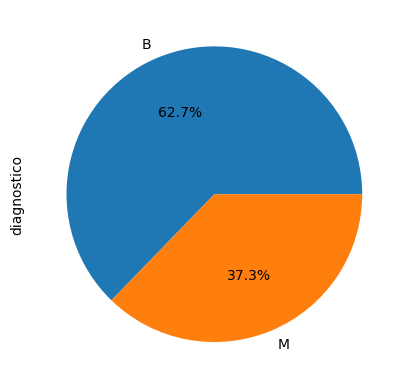

In [15]:
# visualizando a proporção dos dados atráves por gráfico de setores
data['diagnostico'].value_counts().plot(kind='pie', autopct = '%1.1f%%');

Em nossa amostra temos 357 casos de tumores benignos (62,7%) e 212 casos de tumores malignos (37,3%)

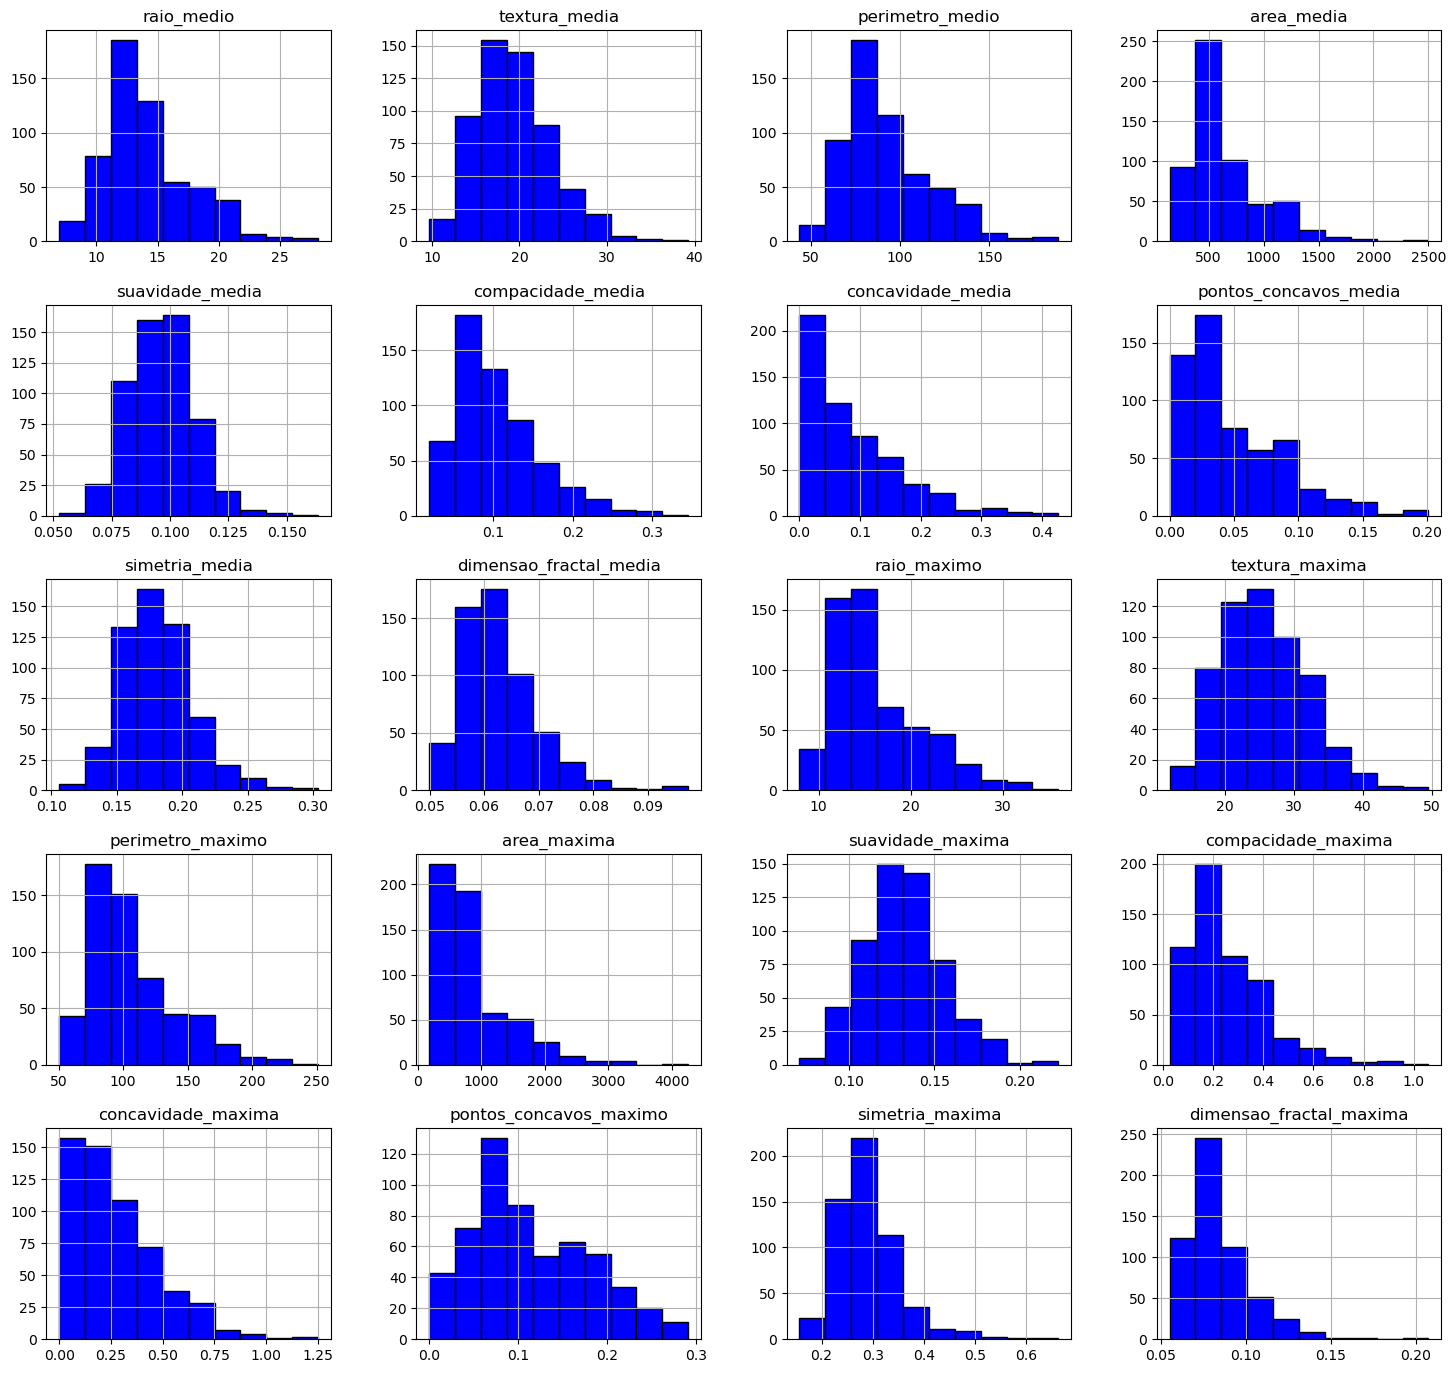

In [16]:
# visualizando a distribuição de cada feature do dataset
data.hist(figsize = (18,17),color = 'blue',edgecolor = 'black');

# Correlações entre as Features

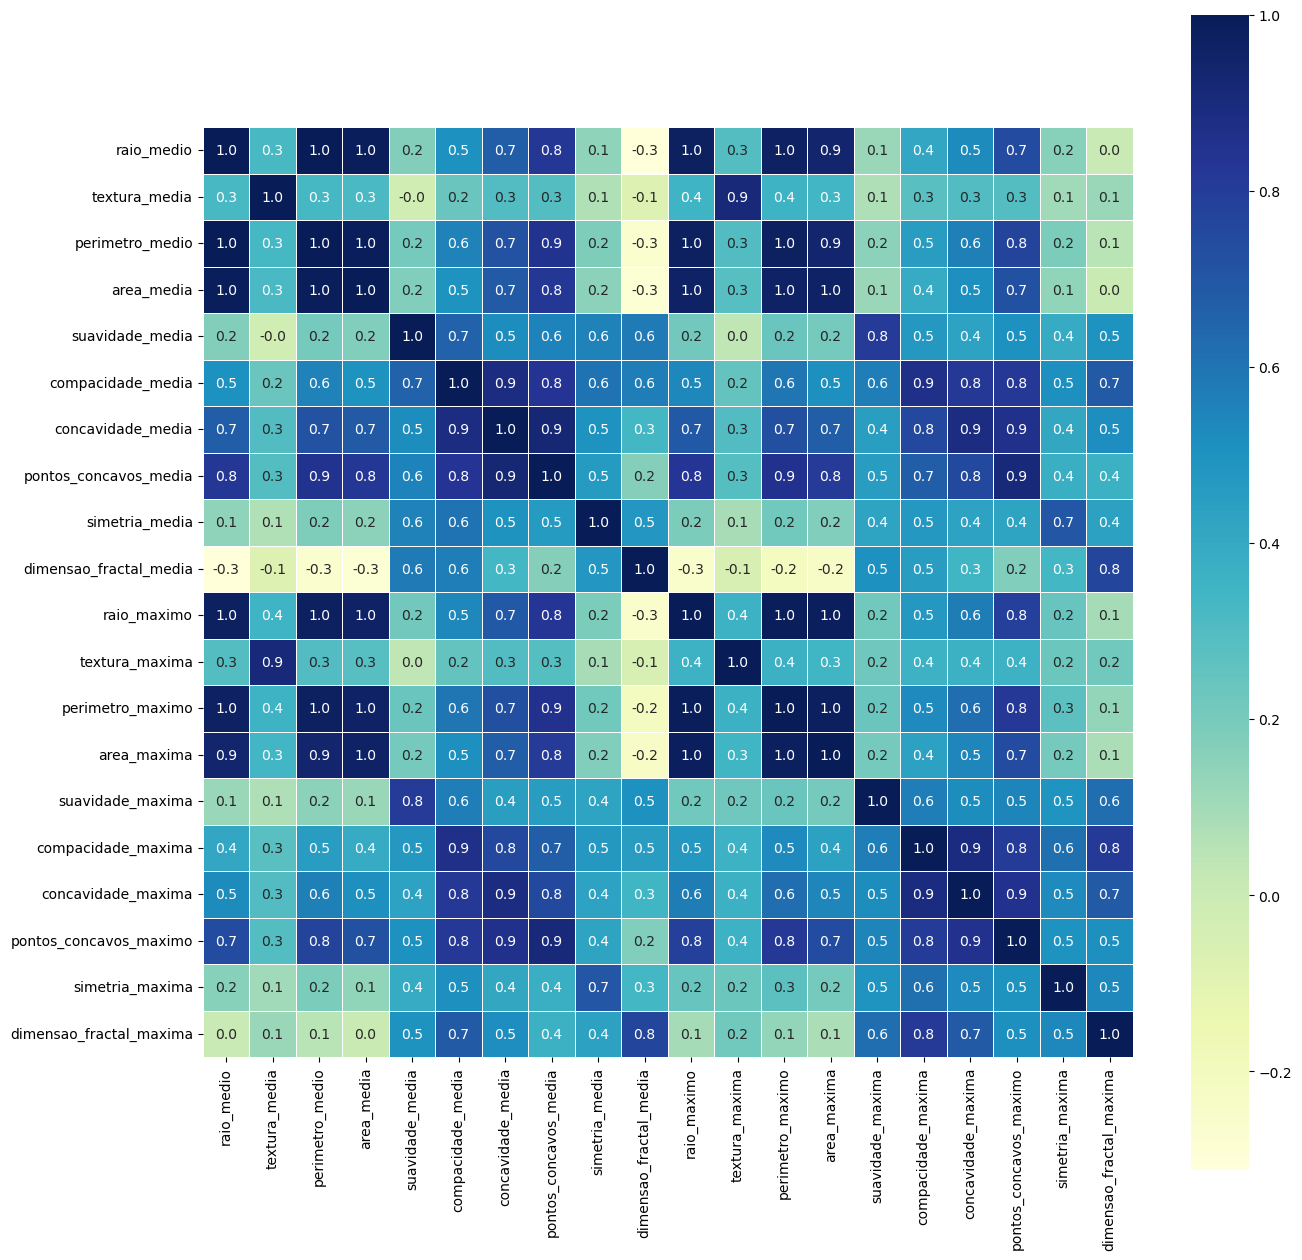

In [17]:
# Verificando a correlação entre cada feature do dataset
corr=data.corr(numeric_only = True)
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True,linewidths=0.5,fmt=".1f",ax=ax,cmap="YlGnBu",square=True)
plt.show()

* Conclusões

Pelo mapa de calor das correlações entre as features, observamos fortes correlações entre algumas features.
Algumas já eram esperadas como é o caso da correlação entre raio, perimetro e área, pois existe uma relação matemática entre as mesmas.
Entretanto, observamos que existem fortes correlações positivas entre as dimensões físicas do tumor com a quantidade de pontos concavos, médio e máximo. 
E, idenficamos correlações positivas significativas entre a dimensao_fractal com a compacidade e suavidade.

In [18]:
# criando variávais para analise de corralação entre as categorias de diagnostico
corr_vars1 = ['raio_medio', 'perimetro_medio', 'area_media',  'raio_maximo', 'perimetro_maximo', 'area_maxima']
corr_vars2 = ['raio_medio', 'perimetro_medio', 'area_media',  'raio_maximo', 'perimetro_maximo', 'area_maxima']

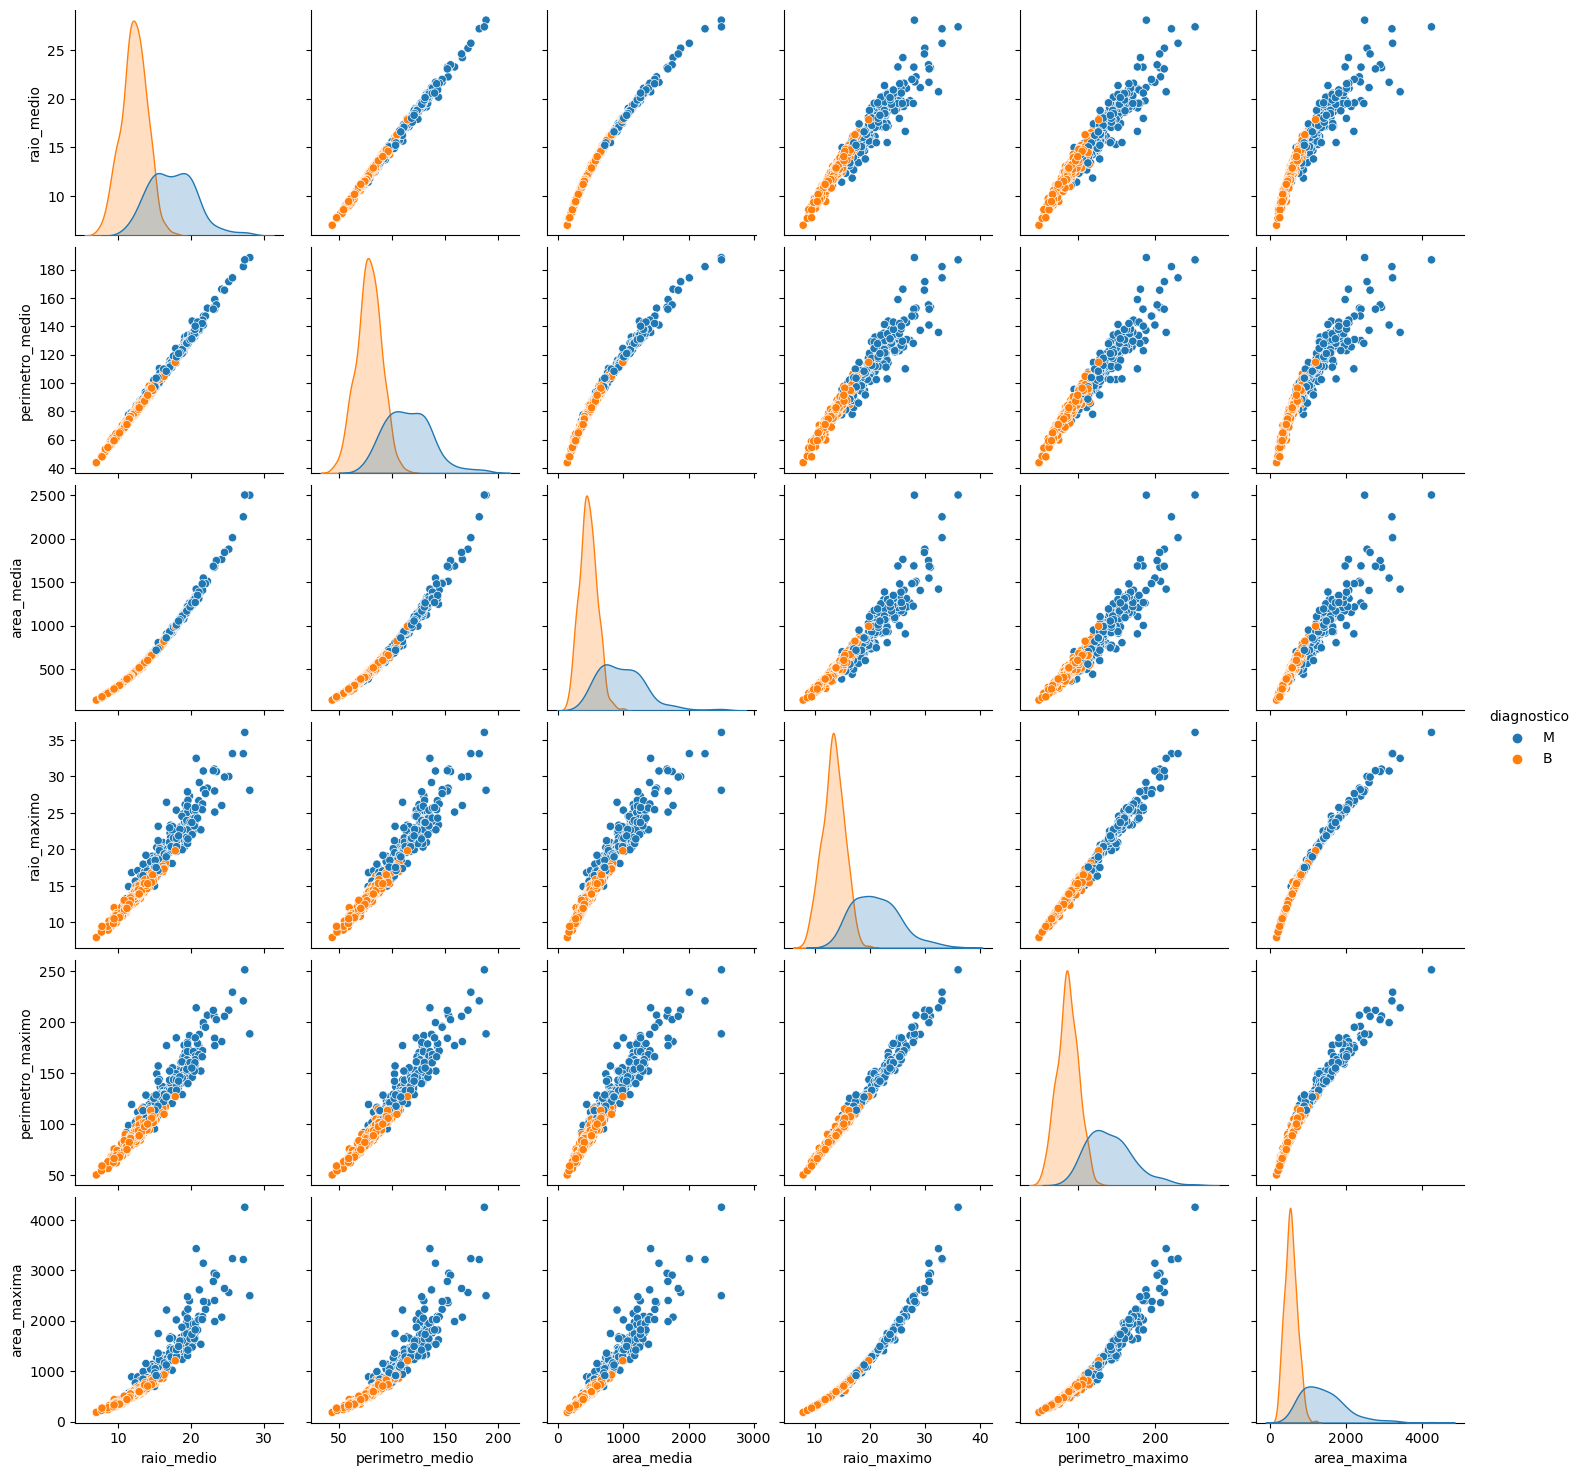

In [19]:
# dispersão dos dados por diagnóstico
sns.pairplot(data, kind='scatter', vars=corr_vars2, hue='diagnostico')
plt.show()

* Conclusões

Observa-se uma grande concentração do diagnóstico do tipo M conforme os valores das features aumentão e distanciam-se de média.
Em uma análise inicial, poderiamos tender a acreditar que as dimensões do tumor são features de alta importância para predição da malignidade da patologia.

# Bloxplot comparativo entre M e B

In [20]:
# preditor de colunas
preditor_cols = [col for col in data.columns if col != 'diagnostico']

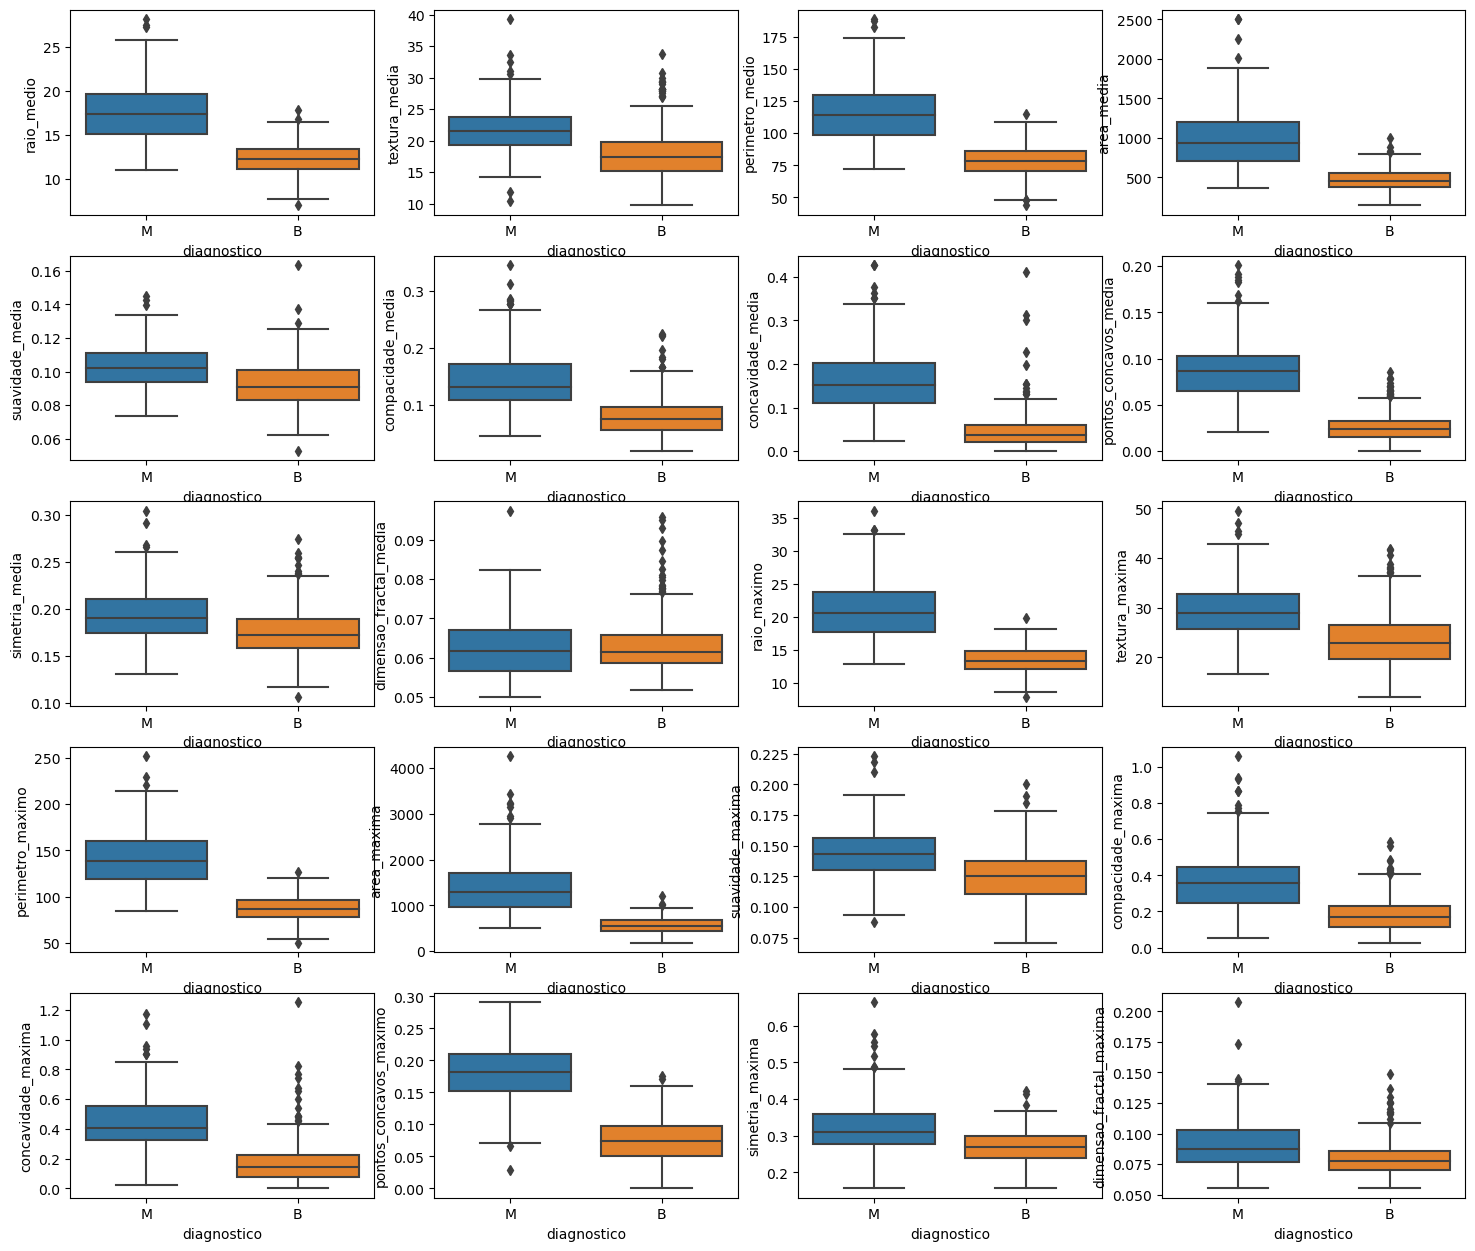

In [23]:
# configurando plot
fig = plt.figure(figsize = (18,25))
rows = 8
cols = 4

for i, col in enumerate(preditor_cols):
    ax = fig.add_subplot(rows, cols, i+1)

    # Diagrama de Boxplot
    sns.boxplot(data = data, x = 'diagnostico', y = col, ax = ax)

* Conclusões



# Estatísticas do grupo M

In [24]:
# gerando dataframe para categoria M
data_M = data[data.diagnostico == "M"]
data_M.shape

(212, 21)

In [25]:
# estatísticas descritivas da categoria M
data_M.describe()

,raio_medio,textura_media,perimetro_medio,area_media,suavidade_media,compacidade_media,concavidade_media,pontos_concavos_media,simetria_media,dimensao_fractal_media,raio_maximo,textura_maxima,perimetro_maximo,area_maxima,suavidade_maxima,compacidade_maxima,concavidade_maxima,pontos_concavos_maximo,simetria_maxima,dimensao_fractal_maxima
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


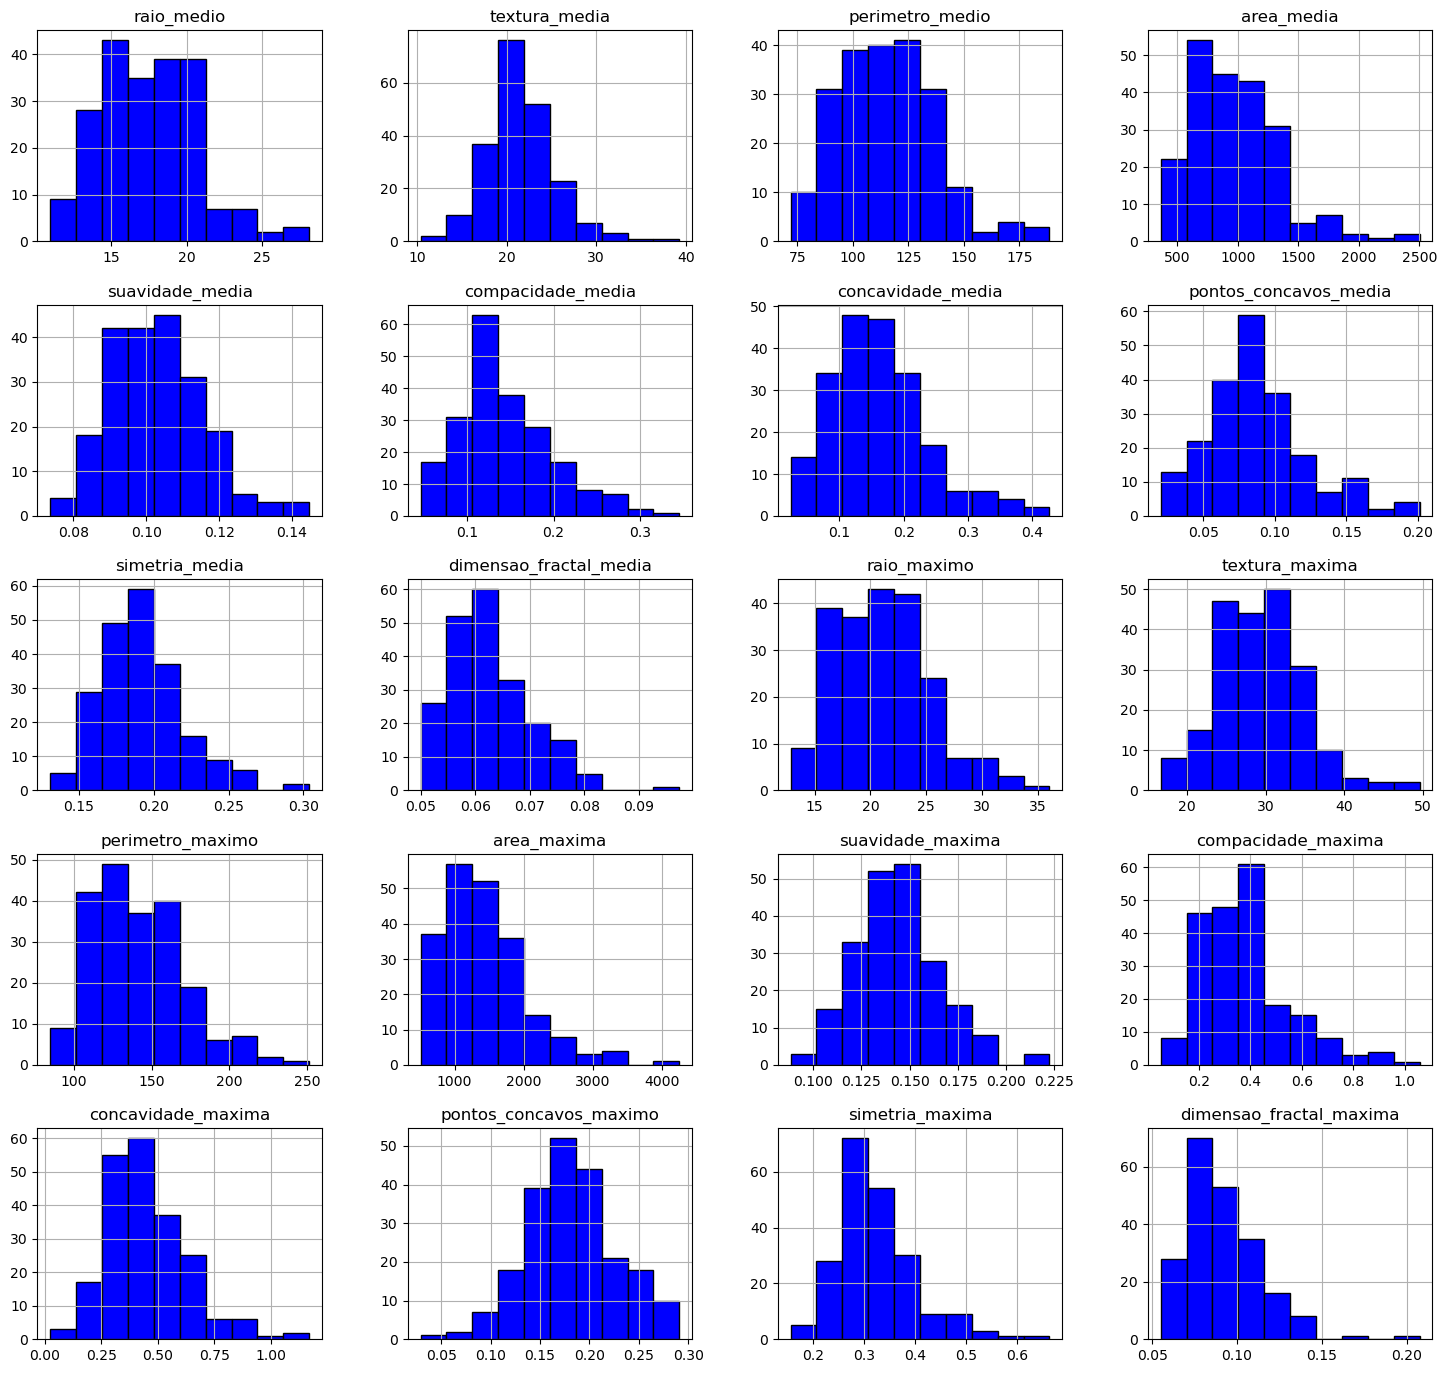

In [26]:
# vizualizando a distribuição das features para categoria M
data_M.hist(figsize = (18,17),color = 'blue',edgecolor = 'black');

# Estatísticas do Grupo B

In [27]:
# gerando dataframe para categoria B
data_B = data[data.diagnostico == "B"]
data_B.shape

(357, 21)

In [28]:
# estatísticas descritivas da categoria B
data_B.describe()

,raio_medio,textura_media,perimetro_medio,area_media,suavidade_media,compacidade_media,concavidade_media,pontos_concavos_media,simetria_media,dimensao_fractal_media,raio_maximo,textura_maxima,perimetro_maximo,area_maxima,suavidade_maxima,compacidade_maxima,concavidade_maxima,pontos_concavos_maximo,simetria_maxima,dimensao_fractal_maxima
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


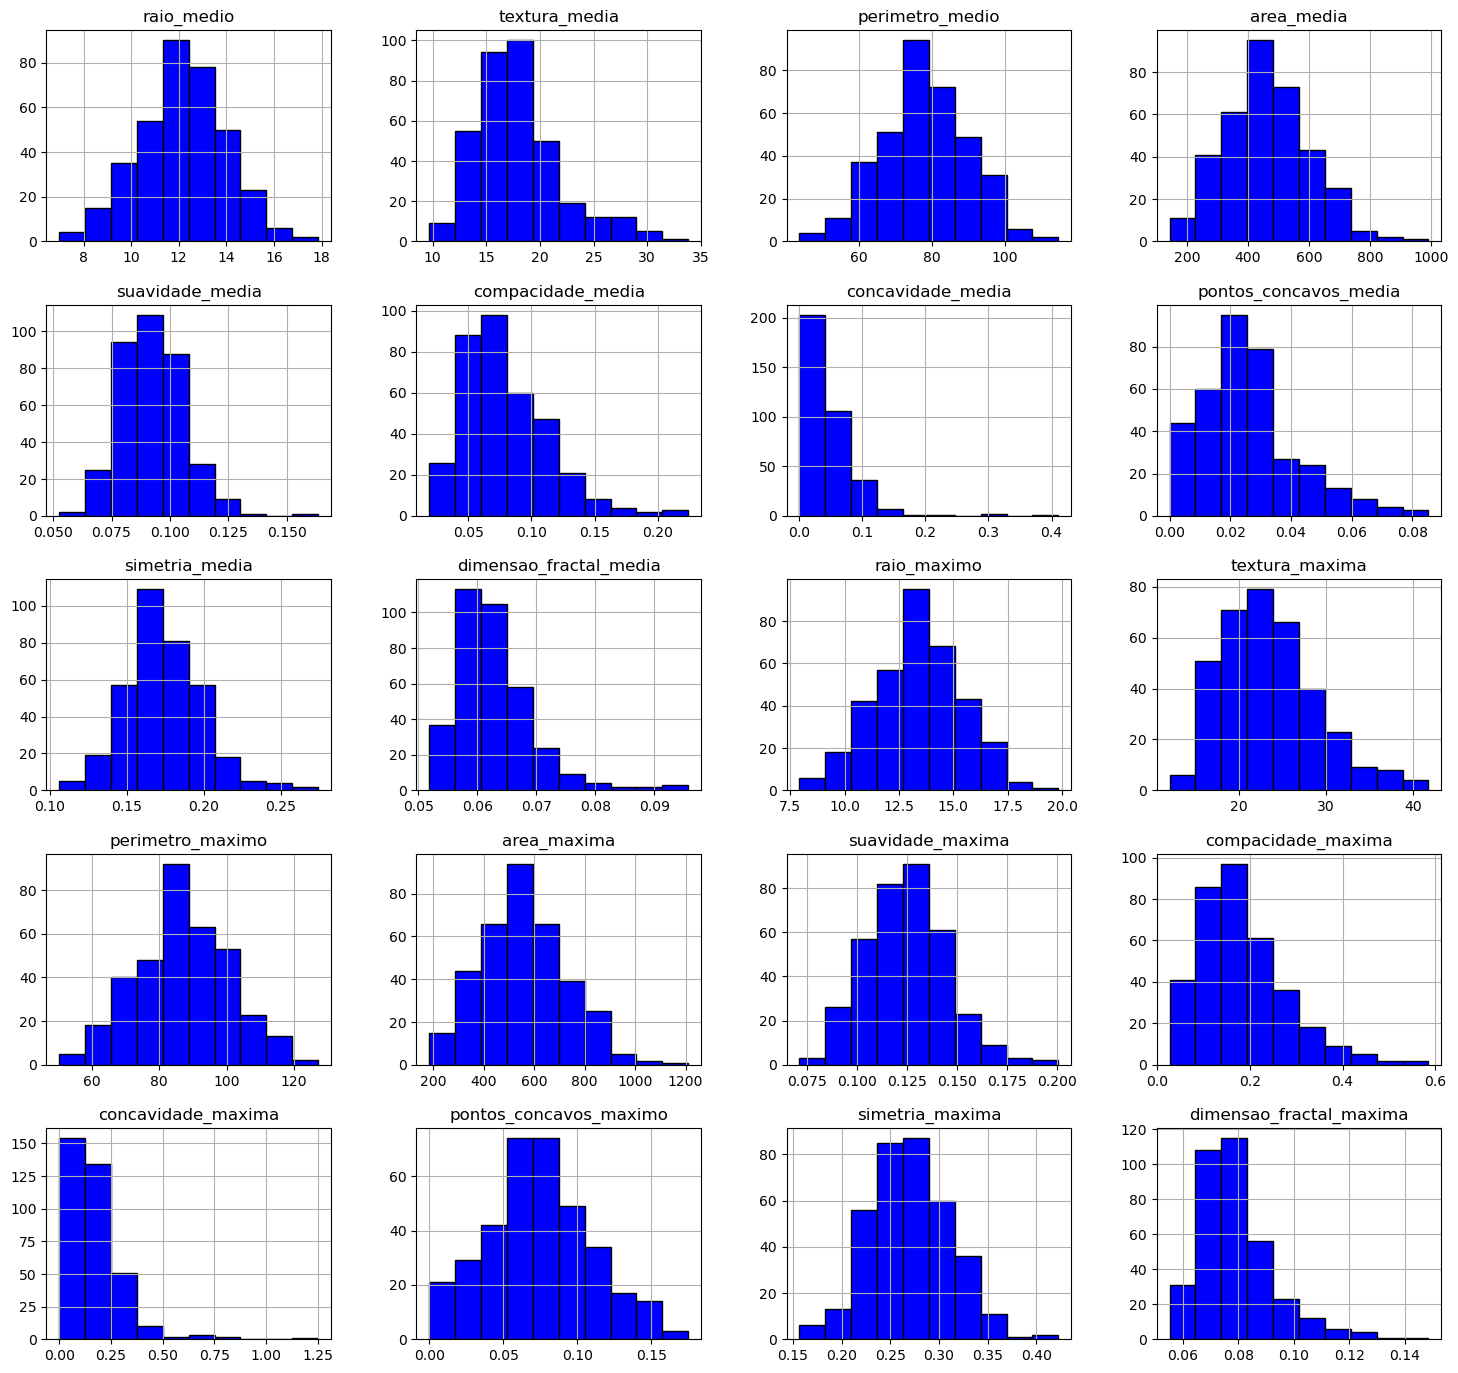

In [29]:
# vizualizando a distribuição das features para categoria B
data_B.hist(figsize = (18,17),color = 'blue',edgecolor = 'black');

# Implementando ML para definir as principais features

In [30]:
# mapeando diagnosticos B e M (neste caso iremos utilizar 0 para B e 1 para M)
mapeamento = {'B': 0, 'M': 1}
data['diagnostico'] = data['diagnostico'].map(mapeamento)

data.head()

,diagnostico,raio_medio,textura_media,perimetro_medio,area_media,suavidade_media,compacidade_media,concavidade_media,pontos_concavos_media,simetria_media,...,raio_maximo,textura_maxima,perimetro_maximo,area_maxima,suavidade_maxima,compacidade_maxima,concavidade_maxima,pontos_concavos_maximo,simetria_maxima,dimensao_fractal_maxima
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
# Contando diagnostico por categoria
total_categoria = data["diagnostico"].value_counts()
total_categoria

0    357
1    212
Name: diagnostico, dtype: int64

In [32]:
# verificando as features
data.columns

Index(['diagnostico', 'raio_medio', 'textura_media', 'perimetro_medio',
       'area_media', 'suavidade_media', 'compacidade_media',
       'concavidade_media', 'pontos_concavos_media', 'simetria_media',
       'dimensao_fractal_media', 'raio_maximo', 'textura_maxima',
       'perimetro_maximo', 'area_maxima', 'suavidade_maxima',
       'compacidade_maxima', 'concavidade_maxima', 'pontos_concavos_maximo',
       'simetria_maxima', 'dimensao_fractal_maxima'],
      dtype='object')

In [33]:
# estabelecendo variáveis X e Y
X_dados = data.drop("diagnostico", axis=1)
y_dados = data["diagnostico"].values

In [34]:
# verificando formato das variáveis
print(X_dados.shape)
print(y_dados.shape)

(569, 20)
(569,)


In [35]:
# criando função para separar dados em treino (80%) e teste (20%)
def separa_treino_teste(x_dados, y_dados):
    x_train, x_test, y_train, y_test = train_test_split(X_dados, y_dados, random_state= 42, test_size=0.2)
    return x_train, x_test, y_train, y_test

In [36]:
#Separando conjuntos de treino e teste
x_train, x_test, y_train, y_test = separa_treino_teste(X_dados, y_dados)

# Criando modelo RandomForest

In [37]:
# Criar o classificador Random Forest
classifier = RandomForestClassifier(random_state=42)

# Criar modelo de classificação
modelo = classifier.fit(x_train, y_train)


# Realizar predições
y_pred = modelo.predict(x_test)

In [38]:
# visualizando features do modelo por importância

print(modelo.feature_importances_)

[0.0278196  0.02501323 0.0253815  0.04486743 0.00851534 0.00564812
 0.05181155 0.15677088 0.00528334 0.00751386 0.13995861 0.0255629
 0.10714117 0.10104337 0.01310202 0.01402002 0.04102249 0.17643395
 0.01546245 0.00762818]


In [39]:
# organizando as features por importância de forma descendente

pd.DataFrame(modelo.feature_importances_, columns = ['Importancia'], index = ['raio_medio', 'textura_media', 'perimetro_medio',
       'area_media', 'suavidade_media', 'compacidade_media',
       'concavidade_media', 'pontos_concavos_media', 'simetria_media',
       'dimensao_fractal_media', 'raio_maximo', 'textura_maxima',
       'perimetro_maximo', 'area_maxima', 'suavidade_maxima',
       'compacidade_maxima', 'concavidade_maxima', 'pontos_concavos_maximo',
       'simetria_maxima', 'dimensao_fractal_maxima']).sort_values('Importancia', ascending=False)

,Importancia
pontos_concavos_maximo,0.176434
pontos_concavos_media,0.156771
raio_maximo,0.139959
perimetro_maximo,0.107141
area_maxima,0.101043
concavidade_media,0.051812
area_media,0.044867
concavidade_maxima,0.041022
raio_medio,0.027820
textura_maxima,0.025563


* Conclusões

Através do levantamento das features de importanciância para o modelo, observamos que a quantidade de pontos côncavos máximo e médio são de suma importância para distinção entre as categorias de diagnostico M e B. Seguidos das features referentes as dimensões espaciais dos tumores como haviámos notado na conclusão da análise das correlações espaciais quanto ao diagnóstico.

In [40]:
acuracia = accuracy_score(y_test, y_pred)
print("Precisão: ", acuracia)

Precisão:  0.9649122807017544


* Conclusão

Pela acuácia do modelo, podemos observar que o modelo de classificação apresentou bons resultados. Entretanto, vale ressaltarmos que não é o intuito neste estudo desenvolver um modelo preditivo, pois temos consciência que muitas outras variáveis devem ser analisadas para um modelo de alta precisão e tais variáveis não estão presentes no dataset que utilizamos.

# Conclusão Final

Através deste estudo, conseguimos observar as correlações existentes entre as dimensões espaciais e como as mesmas podem ajudar da detecção e classificação de tumores em Malignos ou Benignos.
Percebemos que algumas features tem maior grau de importância no diagnóstico comparado a outras. 
E por fim, concluimos que a analise de dados é uma ótima ferramenta para tomada de decisões e até mesmo para diagnóstico médicos. E, com a aplicação de ML, podemos gerar modelo preditivos que com as features corretas pode ajudar na detecção do câncer de mama.